# Calcular a Quantidade de Impactos Prováveis com a Terra
---
Esse programa utiliza os dados disponíveis pela NASA no site do [kaggle](https://www.kaggle.com/nasa/asteroid-impacts) sobre a quantidade de impactos possíveis de asteróides com a Terra em uma faixa pré-estabelecida de tempo. Esse cálculo levará em conta variváveis como Escala de Palermo, a velocidade do objeto, o seu diâmetro, os anos iniciais e finais da contagem e a possibilidade de impacto cumulativa.

In [1]:
""" Importando bibliotecas necessárias """
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
"""Lendo dados do arquivo CSV"""
asteroid_model = pd.read_csv('impacts.csv')

asteroid_model.dropna(axis=0)

asteroid_model.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


# Escala de Palermo
---
A escala de palermo é uma escala utilizada por especialistas na área da Astronomia para medir o risco de impactos potenciais de asteroides na Terra. Para valores inferiores a -2, não há risco, enquanto para valores acima disso há a necessidade de um pequeno acompanhamento.  
$$P = log \frac{p_i}{f_B \cdot T}$$  
- P é o valor da escala.  
- T é o período que falta até o evento.  
- $f_B$ é a frequência anual de impacto, atualmente estimada em $0,03E^{-0,8}$

In [5]:
"""Escolhendo os parâmtros X e y da regressão"""
x_parameters = ['Period Start', 'Period End', 'Asteroid Velocity', 'Asteroid Diameter (km)', 
                'Maximum Palermo Scale']

X = asteroid_model[x_parameters]

y = asteroid_model['Possible Impacts']

In [6]:
"""Separando o conjunto de dados em dados de teste e dados de treino"""
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)

train_X.head()

,Period Start,Period End,Asteroid Velocity,Asteroid Diameter (km),Maximum Palermo Scale
546,2092,2103,1.25,0.002,-8.70
411,2072,2072,12.63,0.013,-8.76
133,2027,2116,9.71,0.012,-7.89
260,2049,2115,4.13,0.006,-7.17
355,2065,2065,4.95,0.018,-7.84


In [7]:
"""Função que retorna o erro absoluto médio da regressão"""
def get_mae(nodes, train_X, val_X, train_y, val_y):
    asteroid_reg = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=1)
    
    asteroid_reg.fit(train_X, train_y)
    prediction = asteroid_reg.predict(val_X)
    mae = mean_absolute_error(val_y, prediction)
    
    return mae

In [8]:
node_list = [2, 5, 10, 50, 100, 150, 200, 250, 300]

best_node = None
mae_min = get_mae(None, train_X, val_X, train_y, val_y)
for i in node_list:
    mae = get_mae(i, train_X, val_X, train_y, val_y)
    if mae < mae_min:
        best_node = i
        mae_min = mae

In [9]:
print('The best node for regression is {}\n The mae is {}'.format(best_node, mae_min))

The best node for regression is 50
 The mae is 27.02511295881734


In [10]:
import matplotlib.pyplot as plt

"""Função para plotar histograma"""
def create_hist(y):
    plt.hist(y, bins=10)
    plt.title('Histograma da Probabilidade de Impacto')
    plt.ylabel('Quantidade de Asteroides')
    plt.xlabel('Quantidade de Possíveis Impactos')
    
    plt.show()

72.29194613486953 33.655073798869424


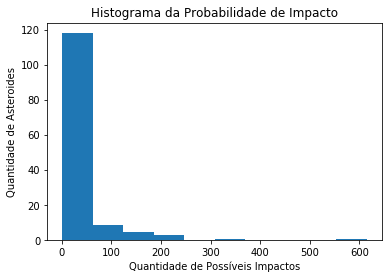

In [12]:
import numpy as np

asteroid_reg = DecisionTreeRegressor(max_leaf_nodes=150, random_state=1)

asteroid_reg.fit(train_X, train_y)
prediction = asteroid_reg.predict(val_X)

mean = np.mean(prediction)
std_dev = np.std(prediction)

print(std_dev, mean)

create_hist(prediction)

In [44]:
from sklearn.ensemble import RandomForestRegressor

index = 1
mae = 100.0
for i in range(1, 1500, 1):
    forest_model = RandomForestRegressor(n_estimators=10, random_state=i)
    forest_model.fit(train_X, train_y)
    forest_prediction = forest_model.predict(val_X)
    
    mae_atual = mean_absolute_error(forest_prediction, val_y)
    if mae_atual < mae:
        mae, index = mae_atual, i

print("O valor do seed é {}".format(index))
print("O valor do mae é {}".format(mae))

O valor do seed é 1392
O valor do mae é 21.571532846715325
